In [66]:
# Notebook for analytics on the result of the republic referendum

### Libraries

In [67]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML, Image

In [68]:
# helper functions
def left_of_bracket(s):
    if '(' in s:
        needle = s.find('(')
        r = s[:needle-1].strip()
        return r
    else:
        return s

In [69]:
filepath = '1999_referenda_output/republic_referendum_by_electorate_by_polling_place.csv'
df_results = pd.read_csv(
    filepath
)

display(df_results.head(3))

,index,state,electorate,polling_place,polling_place_raw,yes_or_no,yes_n,yes_p,no_n,no_p,formal_n,formal_p,informal_n,informal_p,total_n,total_p
0,0,SA,Adelaide,Adelaide,Adelaide (Adelaide),Yes,282,0.6144,177,0.3856,459,0.9871,6,0.0129,465,0.0057
1,1,SA,Adelaide,Adelaide East,Adelaide East,Yes,465,0.6700,229,0.3300,694,0.9914,6,0.0086,700,0.0086
2,2,SA,Adelaide,Adelaide Hospital,Adelaide Hospital,Yes,187,0.6172,116,0.3828,303,0.9806,6,0.0194,309,0.0038


In [70]:
filepath = '1999_referenda_output/republic_referendum_by_polling_place.csv'
df_results_by_pp = pd.read_csv(
    filepath
)

display(df_results_by_pp.head(3))

,state,polling_place,yes_n,no_n,formal_n,informal_n,total_n,yes_p,no_p,formal_p,informal_p
0,ACT,Ainslie,1372,500,1872,24,1896,0.7329,0.2671,0.9873,0.0127
1,ACT,Ainslie North,1608,749,2357,29,2386,0.6822,0.3178,0.9878,0.0122
2,ACT,Aranda,2200,787,2987,21,3008,0.7365,0.2635,0.9930,0.0070


In [71]:
filepath = '1999_referenda_output/polling_places_geocoded.csv'
df_pp = pd.read_csv(
    filepath
)

display(df_pp.head(3))

,state,polling_place,premises,address,suburb,postcode,wheelchair_access,match_source,match_type,latitude,longitude
0,ACT,Bonython,Bonython Primary School,Hurtle Ave,BONYTHON,2905.0,F,2007 Polling Places,"Match 01 - state, premises, postcode",-35.4318,149.083
1,ACT,Calwell,Calwell High School,Casey Cres,CALWELL,2905.0,F,2007 Polling Places,"Match 01 - state, premises, postcode",-35.4406,149.116
2,ACT,Canberra Hospital,The Canberra Hospital,Blding 2 Level 3 Yamba Dr,GARRAN,2605.0,F,2007 Polling Places,"Match 01 - state, premises, postcode",-35.3453,149.100


### Result by state/territory

* The ACT comfortably voted in favour, and was the only jurisdiction to do so
* Victoria was very narrowly opposed
* Queensland was almost 2 to 1 against

In [72]:
r = df_results[['state','yes_n','formal_n']].groupby('state').sum()
r['yes_p'] = round(r['yes_n']/r['formal_n'],4)
display(r.sort_values(['yes_p'],ascending=False))

,yes_n,formal_n,yes_p
state,,,
ACT,127211,201061,0.6327
VIC,1489536,2988674,0.4984
NT,44391,91028,0.4877
NSW,1817380,3913942,0.4643
SA,425869,977444,0.4357
WA,458306,1104826,0.4148
TAS,126271,312784,0.4037
QLD,784060,2094052,0.3744


### The inner cities were the most strongly in favour

The top 5 seats by proportion in favour represent two inner Melbourne and two inner Sydney seats, as well as one of the two Canberra seats

In [73]:
r = df_results[['electorate','yes_n','formal_n']].groupby('electorate').sum()
r['yes_p'] = round(r['yes_n']/r['formal_n'],4)
display(r.sort_values(['yes_p'],ascending=False).head(5))

,yes_n,formal_n,yes_p
electorate,,,
Melbourne,59994,84598,0.7092
Sydney,56921,83894,0.6785
Melbourne Ports,51520,78183,0.6590
Grayndler,51774,79929,0.6477
Fraser,64636,100266,0.6446


### Rural Australia was the most strongly opposed

The top 5 seats by proportion opposed are all large rural seats, four in Queensland and one (Gwydir) in NSW.

In [74]:
r = df_results[['electorate','yes_n','formal_n']].groupby('electorate').sum()
r['yes_p'] = round(r['yes_n']/r['formal_n'],4)
display(r.sort_values(['yes_p'],ascending=True).head(5))

,yes_n,formal_n,yes_p
electorate,,,
Maranoa,17944,78554,0.2284
Blair,18078,71299,0.2536
Wide Bay,19052,74205,0.2567
Groom,21406,78067,0.2742
Gwydir,19274,69355,0.2779


### How predictiveis the geographic size of seat on support for the referendum?

#### Prepare data

In [75]:
# import geographic size of seats
filepath = '1999_referenda/electorate_boundaries/boundaries_republic_referendum_aus.csv'

df_area = pd.read_csv(
    filepath,
    skiprows = 1,
    names = ['electorate','area_sqkm']
)

# make df grouped by electorate

df_by_electorate = df_results[['electorate','yes_n','formal_n']].groupby('electorate').sum()
df_by_electorate['yes_p'] = round(r['yes_n']/r['formal_n'],4)

df_by_electorate = df_by_electorate.reset_index()

# merge in area
df_by_electorate = pd.merge(df_by_electorate, df_area, on='electorate', how='left')

display(df_by_electorate.head(5))

,electorate,yes_n,formal_n,yes_p,area_sqkm
0,Adelaide,45580,80832,0.5639,80.80
1,Aston,43210,83822,0.5155,128.10
2,Ballarat,32784,80129,0.4091,11128.95
3,Banks,34719,75875,0.4576,61.70
4,Barker,26709,82364,0.3243,67077.85


#### create data for scatterplot

In [76]:
from plotly.offline import *
import plotly.offline as py
import plotly.plotly as pyonline
import plotly.graph_objs as go
init_notebook_mode(connected=True) # render plotly charts in the notebook on the fly

In [77]:
series = go.Scatter(
    y = df_by_electorate['yes_p'],
    x = df_by_electorate['area_sqkm'],
    name = '% Yes',
    mode = 'markers',
    text = df_by_electorate['electorate'],
    marker = dict (
        size = 10,
        opacity = 0.6
    )
)

xaxis=dict(
        title = 'Size of Electorate, SqKm',
        titlefont=dict(
            family='Open Sans',
            size=16
        )
)

yaxis = dict(
        title = '% Support',
        titlefont=dict(
            family='Open Sans',
            size=16
        ),
        tickformat = ',.0%',
        range=[.2,.8]
)

title = '1999 Republic Referendum - % Support vs. Size of Electorate'

titlefont = dict(
        family='Open Sans',
        size=22
)

layout = go.Layout(
    title = title,
    titlefont = titlefont,
    xaxis = xaxis,
    yaxis = yaxis
)

data = [series]

figure01 = go.Figure(data=data, layout=layout)

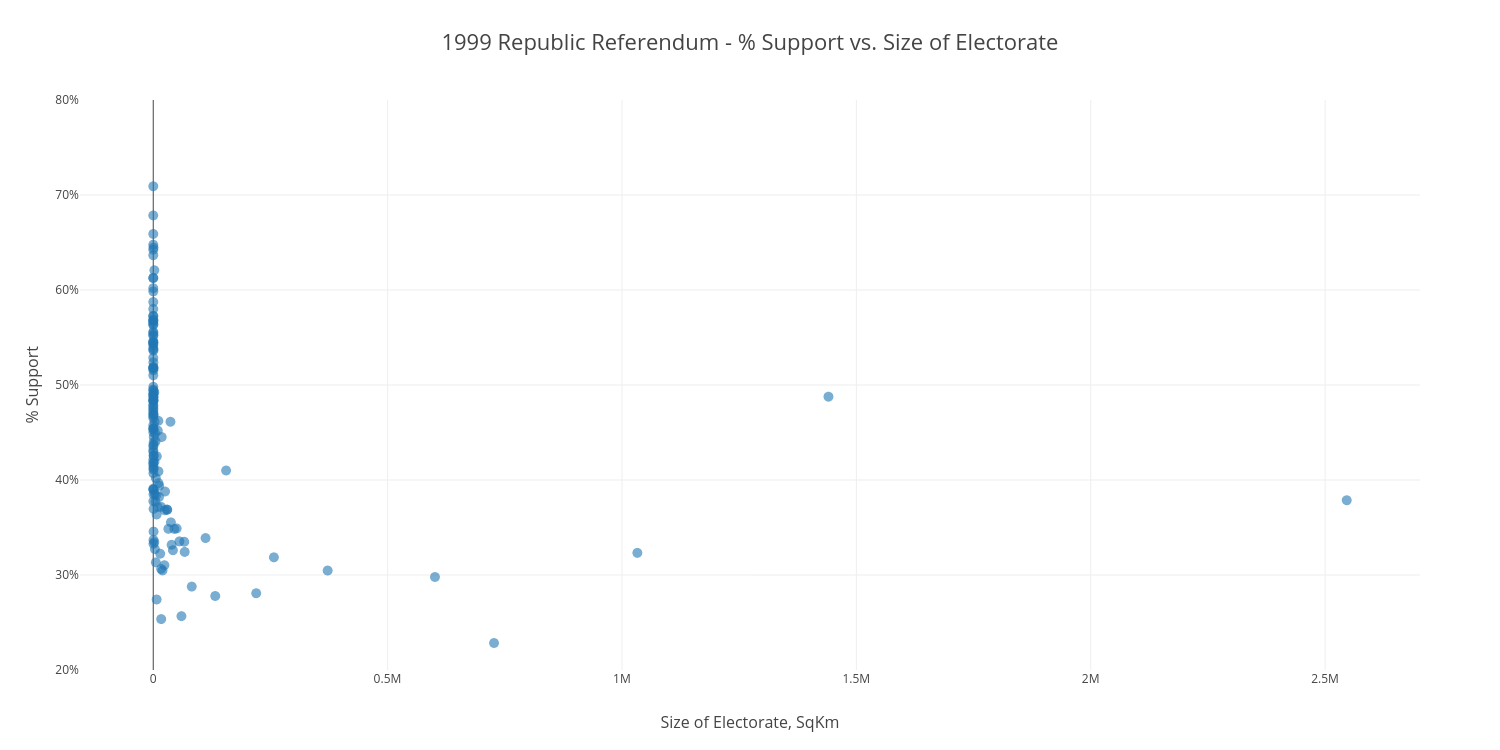

In [110]:
#py.iplot(figure01, filename='figure01')
pyonline.image.ishow(figure01, width=1500, height=750)

### Same chart, using a log scale for electorate size

In [79]:
xaxis=dict(
        title = 'Log of size of Electorate, SqKm',
        titlefont=dict(
            family='Open Sans',
            size=16
        ),
        type='log'
)

title = '1999 Republic Referendum - % Support vs. log(size) of Electorate'

layout = go.Layout(
    title = title,
    titlefont = titlefont,
    xaxis = xaxis,
    yaxis = yaxis
)

figure02 = go.Figure(data=data, layout=layout)

There appears to be a relatively strong relationship between % support for the republic, and size of electorate

Smaller electorates by area (i.e, more densely populated inner-urban electorates) are more likely to support the republic

A noteable outlier is the Northern Terirtory, the second largest electorate by area, still had 49% support

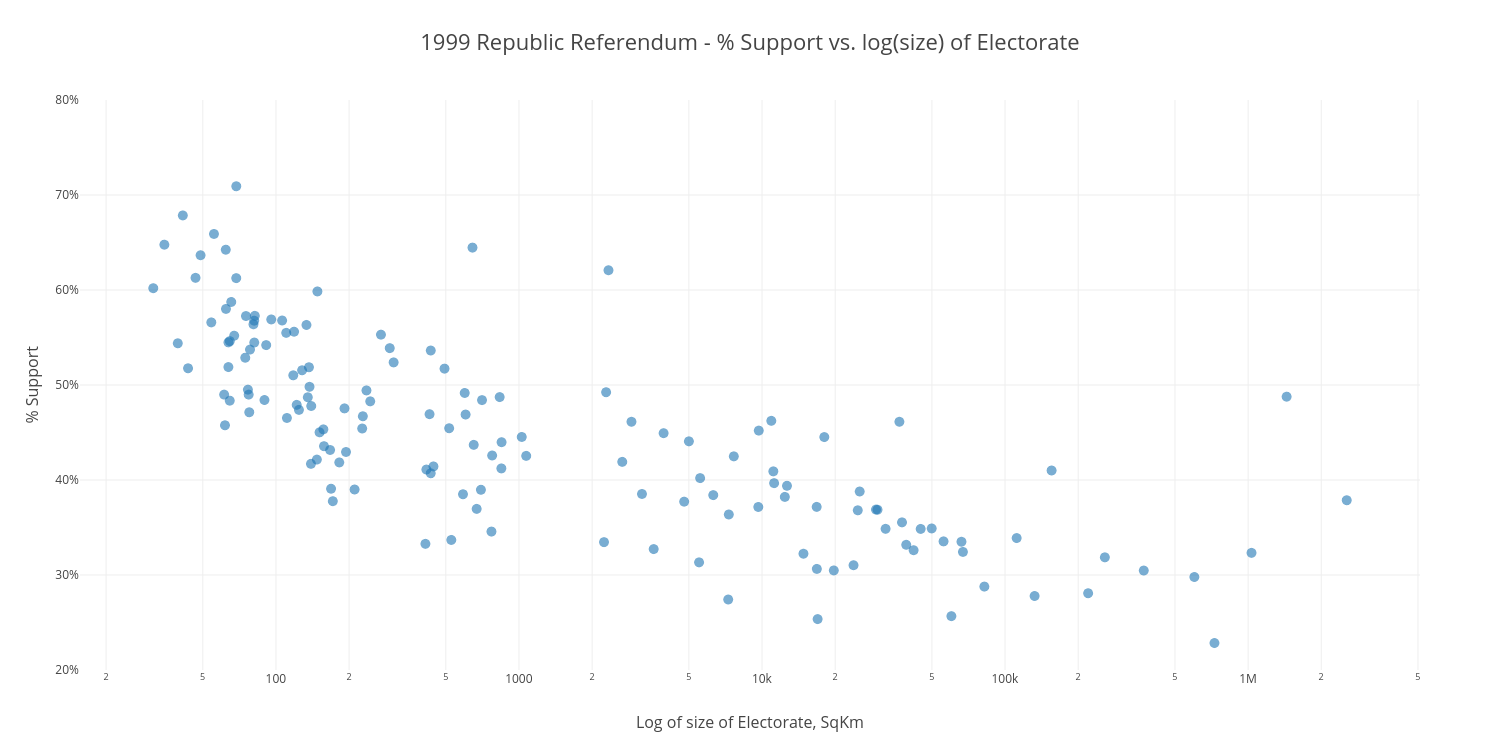

In [109]:
#py.iplot(figure02, filename='figure02')
pyonline.image.ishow(figure02, width=1500, height=750)

### How much does the size of the seat predict support for the republic?

In [81]:
import math
import statsmodels.formula.api as sm

# add log(area) var to df
df_by_electorate['area_sqkm_log'] = df_by_electorate['area_sqkm'].apply(lambda x: math.log(x))
df_by_electorate.head(3)

# run regression
result = sm.ols(formula="area_sqkm_log ~ yes_p", data=df_by_electorate).fit()

display(result.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          area_sqkm_log   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     185.9
Date:                Wed, 02 Aug 2017   Prob (F-statistic):           8.03e-28
Time:                        13:37:58   Log-Likelihood:                -301.06
No. Observations:                 148   AIC:                             606.1
Df Residuals:                     146   BIC:                             612.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.4038      0.703     23.338      0.000      15.015      17.793
yes_p        -20.8541      1.529    -13.635      0.000     -23.877     -17.831
==============================================================================
Omnibus:                       26.282   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.692
Skew:                           0.893   Prob(JB):                     8.84e-10
Kurtosis:                       4.889   Cond. No.                         12.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### You can explain 56% of the variation in support for the Republic with seat size

### Yes vote v size of polling place

In [114]:
series = go.Scatter(
    y = df_results_by_pp['yes_p'],
    x = df_results_by_pp['total_n'],
    name = '% Yes',
    mode = 'markers',
    text = df_results_by_pp['polling_place'],
    marker = dict (
        size = 10,
        opacity = 0.6
    )
)

xaxis=dict(
        title = 'Number of Votes',
        titlefont=dict(
            family='Open Sans',
            size=16
        )
)

yaxis = dict(
        title = '% Support',
        titlefont=dict(
            family='Open Sans',
            size=16
        ),
        tickformat = ',.0%'
)

title = '1999 Republic Referendum - % Support vs. Number of Votes by polling place'

titlefont = dict(
        family='Open Sans',
        size=22
)

layout = go.Layout(
    title = title,
    titlefont = titlefont,
    xaxis = xaxis,
    yaxis = yaxis
)

data = [series]

figure03 = go.Figure(data=data, layout=layout)

It's exceptionally noisy, but there is some relationship between % support for the republic a size of polling place

In [108]:
#py.iplot(figure03, filename='figure03')
pyonline.image.ishow(figure03, width=1500, height=750)

NameError: name 'figure03' is not defined

### Just for fun - is the republic referendum at all predictive of the 2016 federal election result?

In [36]:
import fiona
import geopandas as gp
from shapely.geometry import Point
%matplotlib inline

df_pp['geometry'] = df_pp.apply(lambda z: Point(z.longitude, z.latitude), axis=1)

df_pp_geom = gp.GeoDataFrame(df_pp)

df_pp_geom.head(3)

,state,polling_place,premises,address,suburb,postcode,wheelchair_access,match_source,match_type,latitude,longitude,geometry
0,ACT,Bonython,Bonython Primary School,Hurtle Ave,BONYTHON,2905.0,F,2007 Polling Places,"Match 01 - state, premises, postcode",-35.4318,149.083,POINT (149.083 -35.4318)
1,ACT,Calwell,Calwell High School,Casey Cres,CALWELL,2905.0,F,2007 Polling Places,"Match 01 - state, premises, postcode",-35.4406,149.116,POINT (149.116 -35.4406)
2,ACT,Canberra Hospital,The Canberra Hospital,Blding 2 Level 3 Yamba Dr,GARRAN,2605.0,F,2007 Polling Places,"Match 01 - state, premises, postcode",-35.3453,149.100,POINT (149.1 -35.3453)


### 2016 polling places - import, restrict to ordinary-only, and dedup on location

In [34]:
# import
filepath = 'federal_election_polling_places/pp_2016_election.csv'
df_pp_2016 = pd.read_csv(
    filepath
)

# check
display(df_pp_2016.head(3))

# just ordinary polling places
df_pp_2016 = df_pp_2016[df_pp_2016['PollingPlaceTypeID'] == 1]

# create a polling place column (without seat in the name)
lambda_polling_places = lambda x: left_of_bracket(x)
df_pp_2016['polling_place'] = df_pp_2016['PollingPlaceNm'].apply(lambda_polling_places)

# filter for relevant columns
df_pp_2016 = df_pp_2016[[
    'State',
    'polling_place',
    'Latitude',
    'Longitude'
]]

# make headers lower case
df_pp_2016.columns = [x.lower() for x in df_pp_2016.columns]

# de dup
df_pp_2016 = df_pp_2016.reset_index()
del df_pp_2016['index']
df_pp_2016 = df_pp_2016.drop_duplicates()

df_pp_2016.head(3)

# test - is there only one braddon?
display(df_pp_2016[df_pp_2016['polling_place']=="Braddon"])

# export to csv
df_pp_2016.to_csv(
    'federal_election_polling_places/pp_2016_election_ordinary.csv'
)

,State,DivisionID,DivisionNm,PollingPlaceID,PollingPlaceTypeID,PollingPlaceNm,PremisesNm,PremisesAddress1,PremisesAddress2,PremisesAddress3,PremisesSuburb,PremisesStateAb,PremisesPostCode,Latitude,Longitude
0,NSW,251,Watson,1,1,Beverly Hills North (Watson),Beverly Hills North Public School,cnr Shorter Ave & King Georges Rd,NaN,NaN,BEVERLY HILLS,NSW,2209.0,-33.9413,151.075
1,NSW,103,Banks,2,1,East Hills,1st East Hills Scout Hall,629 Henry Lawson Dr,NaN,NaN,EAST HILLS,NSW,2213.0,-33.9612,150.982
2,NSW,103,Banks,3,1,Riverwood East (Banks),Hannans Road Public School,Hannans Rd,NaN,NaN,RIVERWOOD,NSW,2210.0,-33.9459,151.058


,state,polling_place,latitude,longitude
5549,ACT,Braddon,-35.2736,149.14


### Add geometry to file

In [35]:
df_pp_2016['geometry'] = df_pp_2016.apply(lambda z: Point(z.longitude, z.latitude), axis=1)

df_pp_2016_geom = gp.GeoDataFrame(df_pp_2016)
df_pp_2016_geom.head(5)

,state,polling_place,latitude,longitude,geometry
0,NSW,Beverly Hills North,-33.9413,151.075,POINT (151.075 -33.9413)
1,NSW,East Hills,-33.9612,150.982,POINT (150.982 -33.9612)
2,NSW,Riverwood East,-33.9459,151.058,POINT (151.058 -33.9459)
3,NSW,Lugarno,-33.9850,151.045,POINT (151.045 -33.985)
4,NSW,Mortdale West,-33.9616,151.073,POINT (151.073 -33.9616)


In [39]:
import geopandas as gpd
from shapely.geometry import Point
from shapely.ops import nearest_points

# makes geometry points for each pp
pts = df_pp_2016_geom.geometry.unary_union

# for a given point return nearest poling place
def near(point, polling_places=pts):

    # get the data point from df_pp_2016_geom for which geometry = the geometry of the nearest point
    nearest = df_pp_2016_geom.geometry == nearest_points(point,polling_places)[1]
    # return the index col of pp_2016
    return df_pp_2016_geom[nearest].index.get_values()[0]

# test run, limit dataset
df_pp_geom = df_pp_geom.head(10)

# run 'near' into a new column on the 1999 data frame
df_pp_geom['pp_2016_index'] = df_pp_geom.apply(lambda row: near(row.geometry), axis=1)

display(df_pp_geom.head(3))

,state,polling_place,premises,address,suburb,postcode,wheelchair_access,match_source,match_type,latitude,longitude,geometry,pp_2016_index
0,ACT,Bonython,Bonython Primary School,Hurtle Ave,BONYTHON,2905.0,F,2007 Polling Places,"Match 01 - state, premises, postcode",-35.4318,149.083,POINT (149.083 -35.4318),5655
1,ACT,Calwell,Calwell High School,Casey Cres,CALWELL,2905.0,F,2007 Polling Places,"Match 01 - state, premises, postcode",-35.4406,149.116,POINT (149.116 -35.4406),5611
2,ACT,Canberra Hospital,The Canberra Hospital,Blding 2 Level 3 Yamba Dr,GARRAN,2605.0,F,2007 Polling Places,"Match 01 - state, premises, postcode",-35.3453,149.100,POINT (149.1 -35.3453),5547


In [38]:
# output to csv
# commented out to prevent exporting by accident - the above code takes a while to run
# df_pp_geom.to_csv('1999_referenda_output/polling_places_with_nearest_2016_polling_place.csv',index=False)

### Import Nearest 2016 polling place to each 1999 polling place data

This is done here so we don't have to rerun the matching code block each execution, as it is quite slow to run

In [93]:
filepath = '1999_referenda_output/polling_places_with_nearest_2016_polling_place.csv'
df_pp_1999_nearest_2016 = pd.read_csv(
    filepath
)
df_pp_1999_nearest_2016.head(3)

,state,polling_place,premises,address,suburb,postcode,wheelchair_access,match_source,match_type,latitude,longitude,geometry,pp_2016_index
0,ACT,Bonython,Bonython Primary School,Hurtle Ave,BONYTHON,2905.0,F,2007 Polling Places,"Match 01 - state, premises, postcode",-35.4318,149.083,POINT (149.083 -35.4318),5655
1,ACT,Calwell,Calwell High School,Casey Cres,CALWELL,2905.0,F,2007 Polling Places,"Match 01 - state, premises, postcode",-35.4406,149.116,POINT (149.116 -35.4406),5611
2,ACT,Canberra Hospital,The Canberra Hospital,Blding 2 Level 3 Yamba Dr,GARRAN,2605.0,F,2007 Polling Places,"Match 01 - state, premises, postcode",-35.3453,149.100,POINT (149.1 -35.3453),5547


### Merge in 2016 swing, republic support

In [94]:
# import swing data
filepath = '2016_federal_election_data/two_party_preferred_by_polling_place_2016.csv'
df_sw_2016 = pd.read_csv(
    filepath
)

display(df_sw_2016.head(3))

# tidy up 2016 swing data

# make headers lower case
df_sw_2016.columns = [x.lower() for x in df_sw_2016.columns]

# make a seat-independent polling place column
lambda_polling_places = lambda x:left_of_bracket(x)
df_sw_2016['polling_place'] = df_sw_2016['pollingplace'].apply(lambda_polling_places)

# create a label for state
df_sw_2016['state'] = df_sw_2016['stateab']

# create a column for alp vote
df_sw_2016['alp_n'] = df_sw_2016['australian labor party votes']

# filter for relevant columns
df_sw_2016 = df_sw_2016[[
    'state',
    'polling_place',
    'swing',
    'alp_n',
    'totalvotes'
]]

# convert swing to a percentage
df_sw_2016['swing'] = df_sw_2016['swing']/100

# before merge
print("Lets use Braddon as an example of a joint booth")
print("Before Merge:")
display(df_sw_2016[df_sw_2016['polling_place']=="Braddon"])

# make a weighted swing column
df_sw_2016['weight'] = df_sw_2016['swing'] * df_sw_2016['totalvotes']

print("With weight:")
display(df_sw_2016[df_sw_2016['polling_place']=="Braddon"])

del df_sw_2016['swing']

df_sw_2016 = df_sw_2016.groupby(['state','polling_place']).agg('sum')
df_sw_2016 = df_sw_2016.reset_index()
df_sw_2016['swing'] = df_sw_2016['weight']/df_sw_2016['totalvotes']

print("Merged with weight:")
display(df_sw_2016[df_sw_2016['polling_place']=="Braddon"])

del df_sw_2016['weight']
df_sw_2016['alp_p'] = df_sw_2016['alp_n'] / df_sw_2016['totalvotes']

# after merge
print("Final:")
display(df_sw_2016[df_sw_2016['polling_place']=="Braddon"])

display(df_sw_2016.head(5))

,StateAb,DivisionID,DivisionNm,PollingPlaceID,PollingPlace,Liberal/National Coalition Votes,Liberal/National Coalition Percentage,Australian Labor Party Votes,Australian Labor Party Percentage,TotalVotes,Swing
0,ACT,101,Canberra,8829,Barton,991,44.40,1241,55.60,2232,2.19
1,ACT,101,Canberra,64583,Belconnen CANBERRA PPVC,446,39.86,673,60.14,1119,0.57
2,ACT,101,Canberra,65504,BLV Canberra PPVC,16,48.48,17,51.52,33,15.15


Lets use Braddon as an example of a joint booth
Before Merge:


,state,polling_place,swing,alp_n,totalvotes
4,ACT,Braddon,0.0517,840,1249
65,ACT,Braddon,-0.0176,1080,1457


With weight:


,state,polling_place,swing,alp_n,totalvotes,weight
4,ACT,Braddon,0.0517,840,1249,64.5733
65,ACT,Braddon,-0.0176,1080,1457,-25.6432


Merged with weight:


,state,polling_place,alp_n,totalvotes,weight,swing
11,ACT,Braddon,1920,2706,38.9301,0.014387


Final:


,state,polling_place,alp_n,totalvotes,swing,alp_p
11,ACT,Braddon,1920,2706,0.014387,0.709534


,state,polling_place,alp_n,totalvotes,swing,alp_p
0,ACT,Ainslie North,1734,2257,-0.0010,0.768276
1,ACT,Amaroo,1580,2724,-0.0325,0.580029
2,ACT,Aranda,1757,2447,0.0070,0.718022
3,ACT,BLV Canberra PPVC,17,33,0.1515,0.515152
4,ACT,BLV Fenner PPVC,19,24,-0.1576,0.791667


### merge data on to 1999 polling frame

In [95]:
filepath = 'federal_election_polling_places/pp_2016_election_ordinary.csv'
df_pp_2016_with_ids = pd.read_csv(
    filepath,
    names=['pp_2016_index','state', 'polling_place', 'latitude', 'longitude'],
    skiprows = 1
)
df_sw_2016 = pd.merge(df_sw_2016, df_pp_2016_with_ids, on=['state','polling_place'], how='inner')
display(df_sw_2016.head(3))

del df_sw_2016['state']
del df_sw_2016['polling_place']
del df_sw_2016['latitude']
del df_sw_2016['longitude']

display(df_sw_2016.head(3))

df_pp_1999_nearest_2016 = pd.merge(df_pp_1999_nearest_2016, df_sw_2016, on=['pp_2016_index'], how='left')
display(df_pp_1999_nearest_2016.head(3))

,state,polling_place,alp_n,totalvotes,swing,alp_p,pp_2016_index,latitude,longitude
0,ACT,Ainslie North,1734,2257,-0.0010,0.768276,5548,-35.2543,149.147
1,ACT,Amaroo,1580,2724,-0.0325,0.580029,6317,-35.1653,149.129
2,ACT,Aranda,1757,2447,0.0070,0.718022,5550,-35.2560,149.080


,alp_n,totalvotes,swing,alp_p,pp_2016_index
0,1734,2257,-0.0010,0.768276,5548
1,1580,2724,-0.0325,0.580029,6317
2,1757,2447,0.0070,0.718022,5550


,state,polling_place,premises,address,suburb,postcode,wheelchair_access,match_source,match_type,latitude,longitude,geometry,pp_2016_index,alp_n,totalvotes,swing,alp_p
0,ACT,Bonython,Bonython Primary School,Hurtle Ave,BONYTHON,2905.0,F,2007 Polling Places,"Match 01 - state, premises, postcode",-35.4318,149.083,POINT (149.083 -35.4318),5655,1163,1854,-0.0211,0.627292
1,ACT,Calwell,Calwell High School,Casey Cres,CALWELL,2905.0,F,2007 Polling Places,"Match 01 - state, premises, postcode",-35.4406,149.116,POINT (149.116 -35.4406),5611,1357,2265,-0.0246,0.599117
2,ACT,Canberra Hospital,The Canberra Hospital,Blding 2 Level 3 Yamba Dr,GARRAN,2605.0,F,2007 Polling Places,"Match 01 - state, premises, postcode",-35.3453,149.100,POINT (149.1 -35.3453),5547,704,1244,0.0045,0.565916


### merge in yes/no % for the republic

In [96]:
df_1999_v_2016 = pd.merge(df_pp_1999_nearest_2016, df_results_by_pp, on=['state','polling_place'], how='left')
display(df_1999_v_2016.head(3))

,state,polling_place,premises,address,suburb,postcode,wheelchair_access,match_source,match_type,latitude,...,alp_p,yes_n,no_n,formal_n,informal_n,total_n,yes_p,no_p,formal_p,informal_p
0,ACT,Bonython,Bonython Primary School,Hurtle Ave,BONYTHON,2905.0,F,2007 Polling Places,"Match 01 - state, premises, postcode",-35.4318,...,0.627292,1109.0,707.0,1816.0,14.0,1830.0,0.6107,0.3893,0.9923,0.0077
1,ACT,Calwell,Calwell High School,Casey Cres,CALWELL,2905.0,F,2007 Polling Places,"Match 01 - state, premises, postcode",-35.4406,...,0.599117,1810.0,1098.0,2908.0,21.0,2929.0,0.6224,0.3776,0.9928,0.0072
2,ACT,Canberra Hospital,The Canberra Hospital,Blding 2 Level 3 Yamba Dr,GARRAN,2605.0,F,2007 Polling Places,"Match 01 - state, premises, postcode",-35.3453,...,0.565916,587.0,298.0,885.0,9.0,894.0,0.6633,0.3367,0.9899,0.0101


### make a pretty scatterplot

In [101]:
series = go.Scatter(
    y = df_1999_v_2016['swing'],
    x = df_1999_v_2016['yes_p'],
    name = '2016 Federal Election Swing v. Republic Referendum Yes Vote',
    mode = 'markers',
    text = df_1999_v_2016['polling_place'],
    marker = dict (
        size = 10,
        opacity = 0.6
    )
)

xaxis=dict(
        title = '% Yes, Republic Referendum 1999',
        titlefont=dict(
            family='Open Sans',
            size=16
        ),
        tickformat = ',.0%'

)

yaxis = dict(
        title = 'Swing to ALP, Federal Election 2016',
        titlefont=dict(
            family='Open Sans',
            size=16
        ),
        tickformat = ',.0%'
)

title = '2016 Federal Election Swing v. Republic Referendum Yes Vote'

titlefont = dict(
        family='Open Sans',
        size=18
)

layout = go.Layout(
    title = title,
    titlefont = titlefont,
    xaxis = xaxis,
    yaxis = yaxis
)

data = [series]

figure04 = go.Figure(data=data, layout=layout)

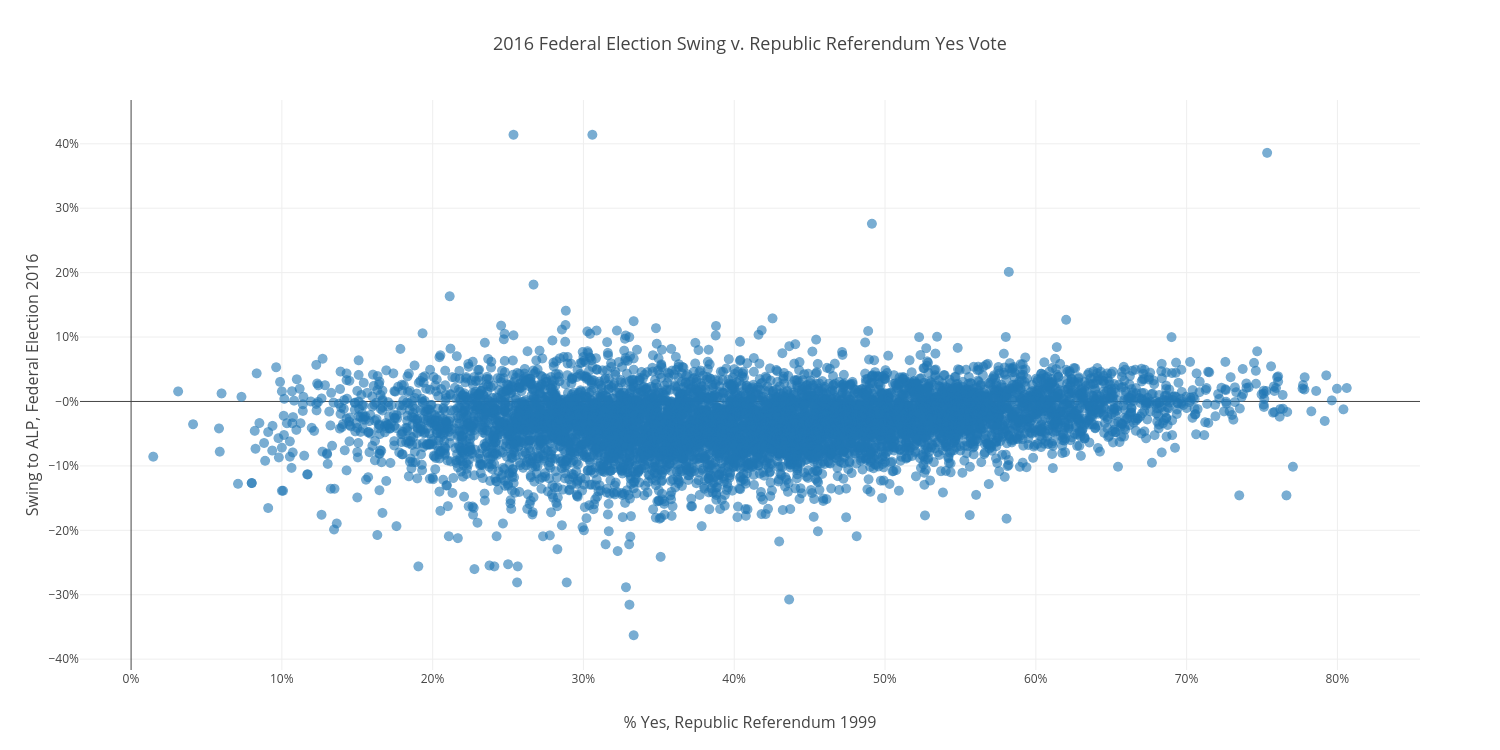

In [107]:
#py.iplot(figure04, filename='figure04')
pyonline.image.ishow(figure04, width=1500, height=750)

### What about Labor two-party vote?

In [102]:
series = go.Scatter(
    y = df_1999_v_2016['alp_p'],
    x = df_1999_v_2016['yes_p'],
    name = 'Labor two-party vote, Federal Election 2016',
    mode = 'markers',
    text = df_1999_v_2016['polling_place'],
    marker = dict (
        size = 10,
        opacity = 0.6,
        color = '#c0211a'
    )
)

yaxis = dict(
        title = 'Labor two-party vote, Federal Election 2016',
        titlefont=dict(
            family='Open Sans',
            size=16
        ),
        tickformat = ',.0%'
)

title = '2016 Federal Election Labor two-party Vote v. Republic Referendum Yes Vote'

layout = go.Layout(
    title = title,
    titlefont = titlefont,
    xaxis = xaxis,
    yaxis = yaxis
)

data = [series]

figure05 = go.Figure(data=data, layout=layout)

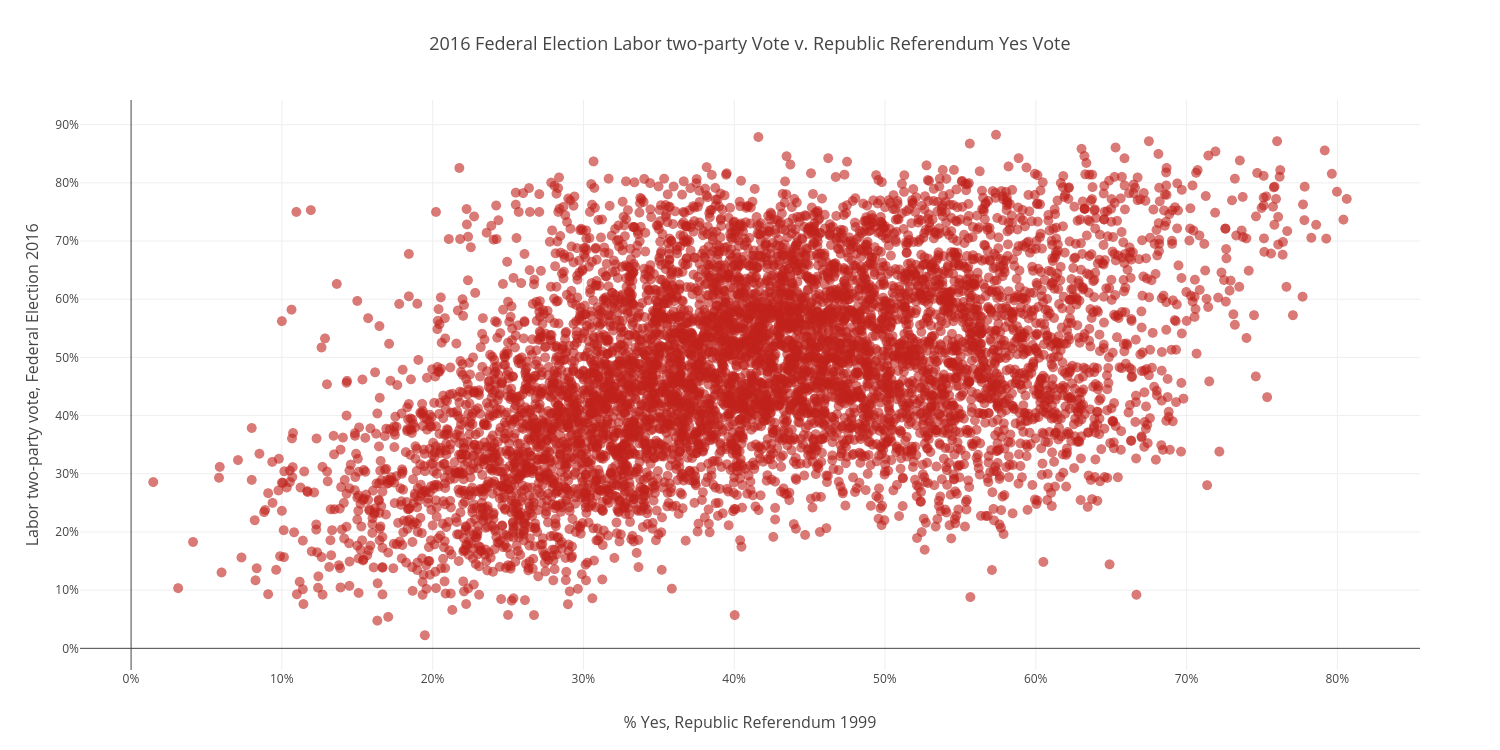

In [106]:
#py.iplot(figure05, filename='figure05')
pyonline.image.ishow(figure05, width=1500, height=750)

### What's the r2 on that?

In [105]:
# run regression
result = sm.ols(formula="yes_p ~alp_p", data=df_1999_v_2016).fit()

display(result.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  yes_p   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     1672.
Date:                Wed, 02 Aug 2017   Prob (F-statistic):               0.00
Time:                        13:56:03   Log-Likelihood:                 5016.4
No. Observations:                7043   AIC:                        -1.003e+04
Df Residuals:                    7041   BIC:                        -1.002e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2373      0.005     52.033      0.000       0.228       0.246
alp_p          0.3700      0.009     40.895      0.000       0.352       0.388
==============================================================================
Omnibus:                      137.884   Durbin-Watson:                   0.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.996
Skew:                           0.303   Prob(JB):                     1.32e-29
Kurtosis:                       2.707   Cond. No.                         7.89
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### You can explain 19% of the variation in the Labor two-party vote in 2016 with the yes vote for the 1999 Republic Referendum